In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load dataset
df = pd.read_csv("Dataset/1 Predictive Maintenance.csv")

<Axes: >

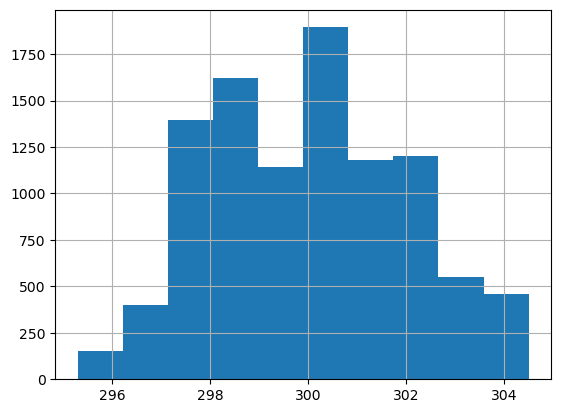

In [3]:
# Drop duplicates
df.drop_duplicates(inplace=True)

df['Air temperature [K]'].hist()

<Axes: >

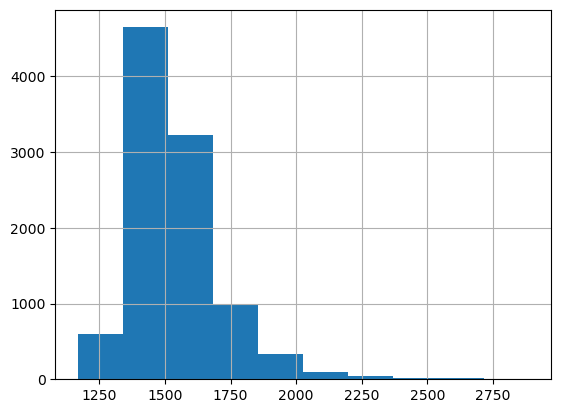

In [4]:
df['Rotational speed [rpm]'].hist()

In [5]:
# Handle missing values
# For categorical columns (including 'Type'), fill with mode; for numeric, fill with median.
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Ensure the column is correctly named and clean
df['Type'] = df['Type'].astype(str).str.strip().str.upper()  # Convert to uppercase if needed        

# Convert 'Type' column from letters (L, M, H) to numbers.
# For example, L -> 1, M -> 2, H -> 3.
type_mapping = {'L': 1, 'M': 2, 'H': 3}
df['Type'] = df['Type'].map(type_mapping)

# Define the numeric columns for normalization
numeric_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization on the specified columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [6]:
# Save the cleaned and normalized dataset
df.to_csv("Dataset/2 Cleaned_Predictive_Maintenance.csv", index=False)

print("Data cleaning, type conversion, and normalization complete.")

Data cleaning, type conversion, and normalization complete.
